## Creating a Web Data Project with Jupyter Notebooks
******
###### 1. Read in json file(s) resulting from your work with requests/selenium and beautifulsoup

In [35]:
# Import necessary packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Read in json files and create dataframes
data = pd.read_json('2017-02-23.AllRecipes.json')
data2 = pd.read_json('2017-03-14.AllRecipes.json')

###### 2. Clean the data column by column
- Ensure that addresses (or other text data) are consistent 
- Eliminate string characters from numeric values 
- Exclude redundant data as appropriate

In [28]:
# Clean up location data to ensure consistency


In [29]:
# Show results of cleaning


In [30]:
# Eliminate string characters from numeric data


In [31]:
# Show results of cleaning

In [32]:
# Exclude redundant rows
NoDupsData = data.drop_duplicates()
NoDupsData2 = data2.drop_duplicates()

###### 3. Merge dataframes from separate json files as appropriate
- Find the intersection of two (or more) sets
- Compare the intersection with the newer set to find 'New Products'  
    - When found, add the starting date
- Compare the intersection with the older set to find 'Closed Products'  
    - When found, add the closing date
    - Compare closing date with starting date to find days on market      

In [54]:
# Create the inner merge of the two dataframes
dataInnerMerge = pd.merge(NoDupsData, NoDupsData2, \
                          on=['Author','Name','Description','Rating'], \
                          how='inner')

In [55]:
dataInnerMerge

,Author,Description,Name,Rating,key1_x,key1_y


In [57]:
# Determine the set of 'new products'
NoDupsData2['key1'] = 1
dataInnerMerge['key2'] = 1
newProducts = pd.merge(NoDupsData2, dataInnerMerge, \
                      on=['Author', 'Name','Description','Rating'], \
                      how = 'left')

# Create the associated dataframe
newProducts = newProducts[newProducts.key2 != newProducts.key1]
    
# Add the starting date in the dataframe 
# in which the product is first shown


In [61]:
# Determine the set of 'closed products'
NoDupsData['key1'] = 1
closedProducts = pd.merge(NoDupsData, dataInnerMerge, \
                      on=['Author', 'Name', 'Description','Rating'], \
                      how = 'left')

# Create the associated dataframe
closedProducts = closedProducts[closedProducts.key2 != closedProducts.key1]

# Add the closing date in the dataframe 
# in which the product is last shown


# Find days on market by comparing the starting date 
# with the closing date

###### 4. Create visualizations
- Histogram of Prices
- Histogram of Days on Market
- Scatter Diagram of Prices vs Days on Market
- Pie Chart of New, Like New, Used

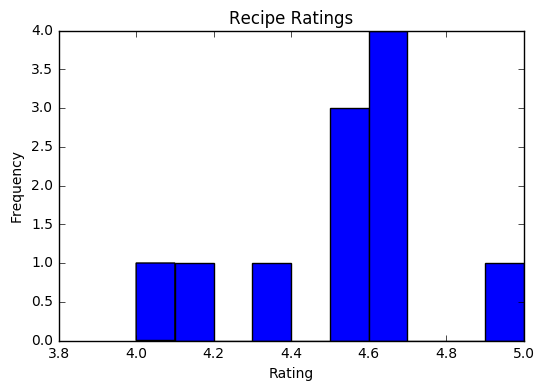

In [65]:
# Create a histogram of Prices
ratings = newProducts.Rating[newProducts['Rating'] > 0.0]
# goodPrices = goodPrices[goodPrices < 1500.0]
plt.hist(ratings)
plt.title("Recipe Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Temporary Data for Days on Market ... for Scatter Plot Example


# Create a histogram of Days on Market


# Create a Scatter Diagram of Prices vs Days on Market


# Create a Pie Chart of New, Like New, and Used products




###### 5. Trends from your data  
- Search for specific brands and offer counts for each
- Search for product types and offer counts for each
- For each of the above (and other) give counts for day over day or week over week

In [4]:
# List the products representing specific brands of your choosing
# for each date provided


# Create a bar chart of products by brand (for the brands chosen)



# List the products of a specific type


# Create a bar chart of products by specific type
# for each date provided



In [5]:
# Show resulting dataframes of interest